In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import scipy.optimize as opt
import typing as tp
from numba import njit

### Задача 1

In [255]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

In [256]:
func = lambda x, w1, w2, w3, w4: np.power(x, w2) * w1 + np.power(x, w4) * w3
param_curve_fit, cov_matrix = opt.curve_fit(func, x, y, p0 = [20, 4, -30, 3])
print(param_curve_fit)
print(cov_matrix)

[ 3.00860854  8.5844716  -3.9962949   0.24936605]
[[ 8.85070526e-04  2.15568654e-03  5.48151892e-05 -9.31717896e-06]
 [ 2.15568654e-03  6.50965592e-03  2.46223952e-04 -4.46944024e-05]
 [ 5.48151892e-05  2.46223952e-04  1.68896778e-05 -3.34831788e-06]
 [-9.31717896e-06 -4.46944024e-05 -3.34831788e-06  7.74351930e-07]]


In [257]:
param_polynom = np.polyfit(x, y, 4)
print(param_polynom)

[ 22.31513595 -37.72653678  24.99906654  -9.54808903  -1.50612742]


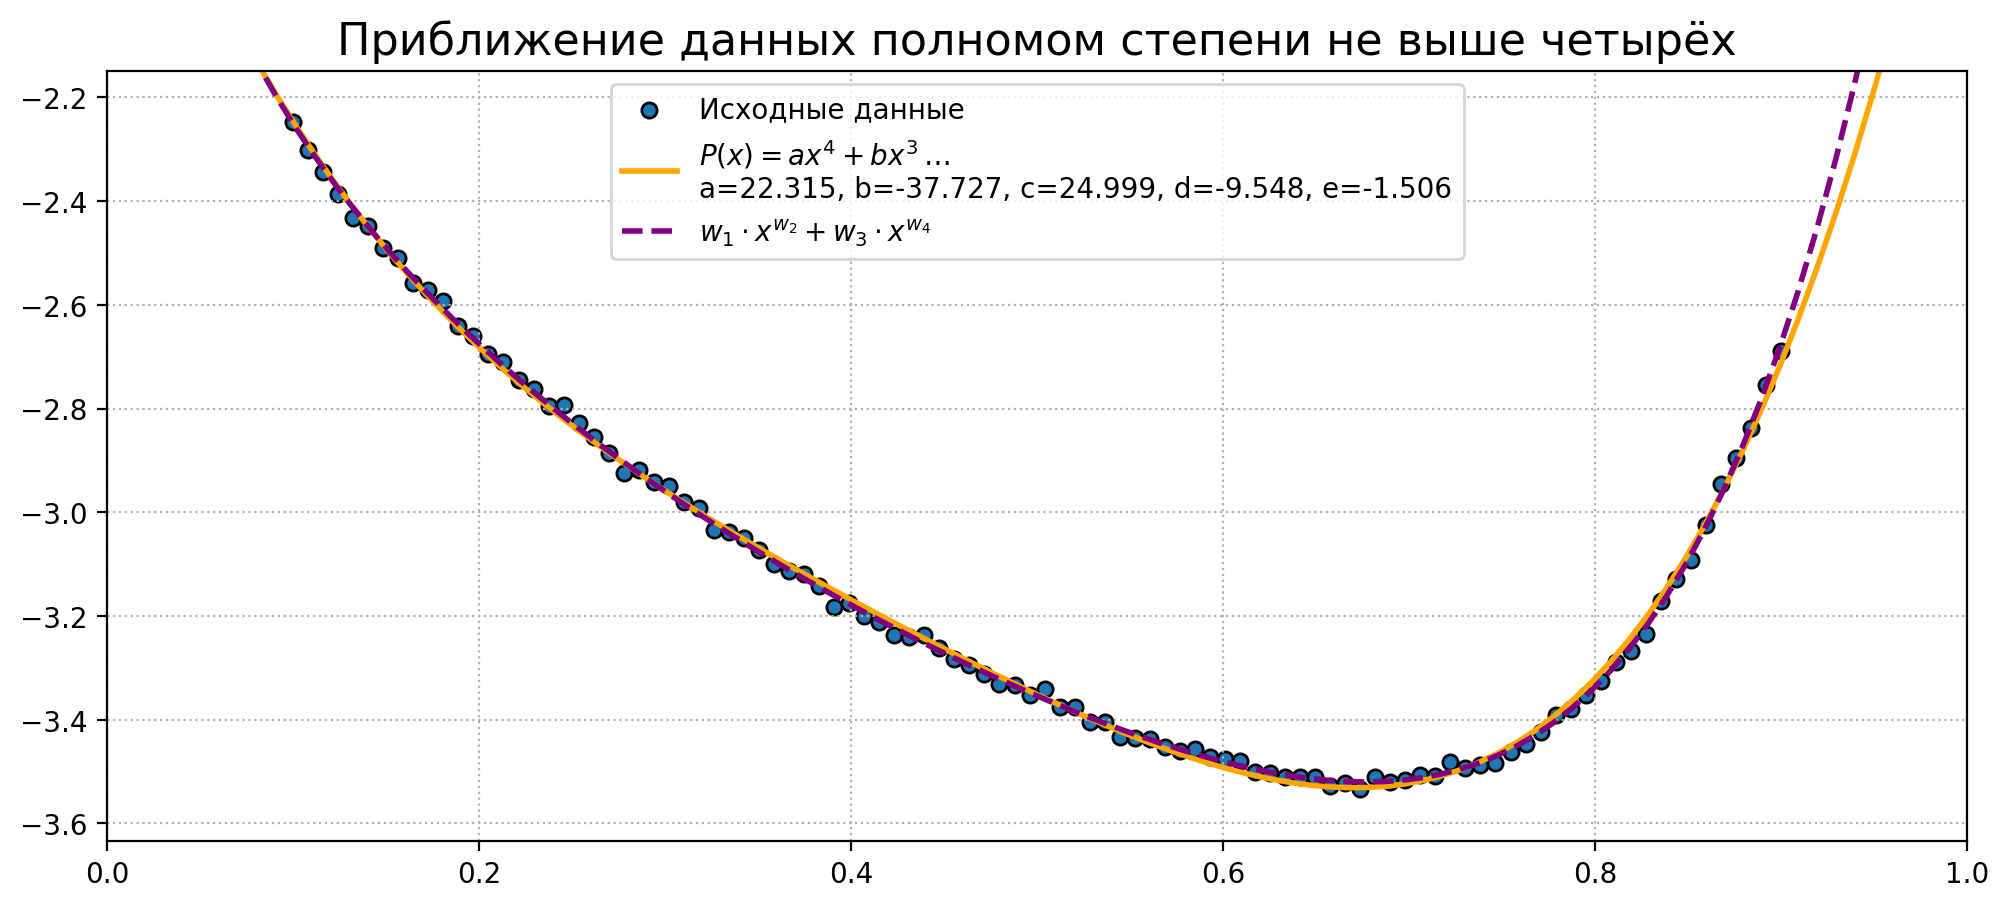

In [258]:
plt.figure(figsize = (12, 5), dpi = 200)

x_line = np.linspace(0, 1, 100)
plt.scatter(x, y, s = 30, edgecolor = 'k', label = 'Исходные данные')
plt.plot(x_line, np.poly1d(param_polynom)(x_line), color = 'orange', linewidth = 2, label = '$P(x) = a x^4 + b x^3 \dots$\na=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(param_polynom))
plt.plot(x_line, func(x_line, *param_curve_fit), color = 'purple', linewidth  = 2, linestyle = '--', label = r'$w_1 \cdot x^{w_2} + w_3 \cdot x^{w_4}$')
plt.xlim(np.min(x) - 0.1, np.max(x) + 0.1)
plt.ylim(np.min(y) - 0.1, np.max(y) + 0.1)
plt.title("Приближение данных полномом степени не выше четырёх", fontsize = 16)
plt.legend()
plt.grid(ls = ":")

### Задача 2

Найти точку локального минимума функции $f(x) = 2 x^{2} - \operatorname{ln}(x)$ и функции $f(t) = (t^{2} - 3) / (t + 2)$

In [259]:
@njit
def fibbonaci_count(N: int) -> np.ndarray:
    numeron = np.ascontiguousarray(np.zeros(N, dtype = np.ulonglong))
    numeron[0] = np.ulonglong(1)
    numeron[1] = np.ulonglong(1)
    for i in np.arange(2, N, 1):
        numeron[i] = numeron[i - 1] + numeron[i - 2]
    return numeron

fibbonaci_numbers = fibbonaci_count(70)

In [260]:
print(fibbonaci_numbers[-1])

190392490709135


In [261]:

def fibbonaci_minimization(func: tp.Callable, left_boubd: float = -1.6, right_bound: float = 1.6, N: int = 70):
    """Минимизация функции методом фиббоначи

    Args:
        func (tp.Callable): Минимизируемая функция
        left_boubd (float, optional): Левая граница отрезка на котором минимизируется функция
        right_bound (float, optional): Правая граница отрезка на котром минимизируется функция
        N (int, optional): Число итераций. Defaults to 100.
    """
    history = {"a": [], "b": [], "x1": [], "x2": []}
    a, b = left_boubd, right_bound
    for n in np.arange(N - 1, 1, -1, dtype = np.int64):
        x1 = a + (b - a) * fibbonaci_numbers[n - 2] / fibbonaci_numbers[n]
        x2 = a + (b - a) * fibbonaci_numbers[n - 1] / fibbonaci_numbers[n]
        history["a"].append(a)
        history["b"].append(b)
        history["x2"].append(x2)
        history["x1"].append(x1)
        if func(x1) > func(x2): 
            a = x1      
        else:  
            b = x2

    return (x1 + x2) / 2, history
            
            

In [262]:
f1 = lambda x: 2 * np.power(x, 2) - np.log(np.abs(x) + 1e-6)
f2 = lambda t: (np.power(t, 2) - 3) / ((t + 2))

min_f1, _ = fibbonaci_minimization(f1, N = 50)
min_f2, history = fibbonaci_minimization(f2, N = 20)
print(min_f1, min_f2)

0.4999994964274175 -1.0002069475240205


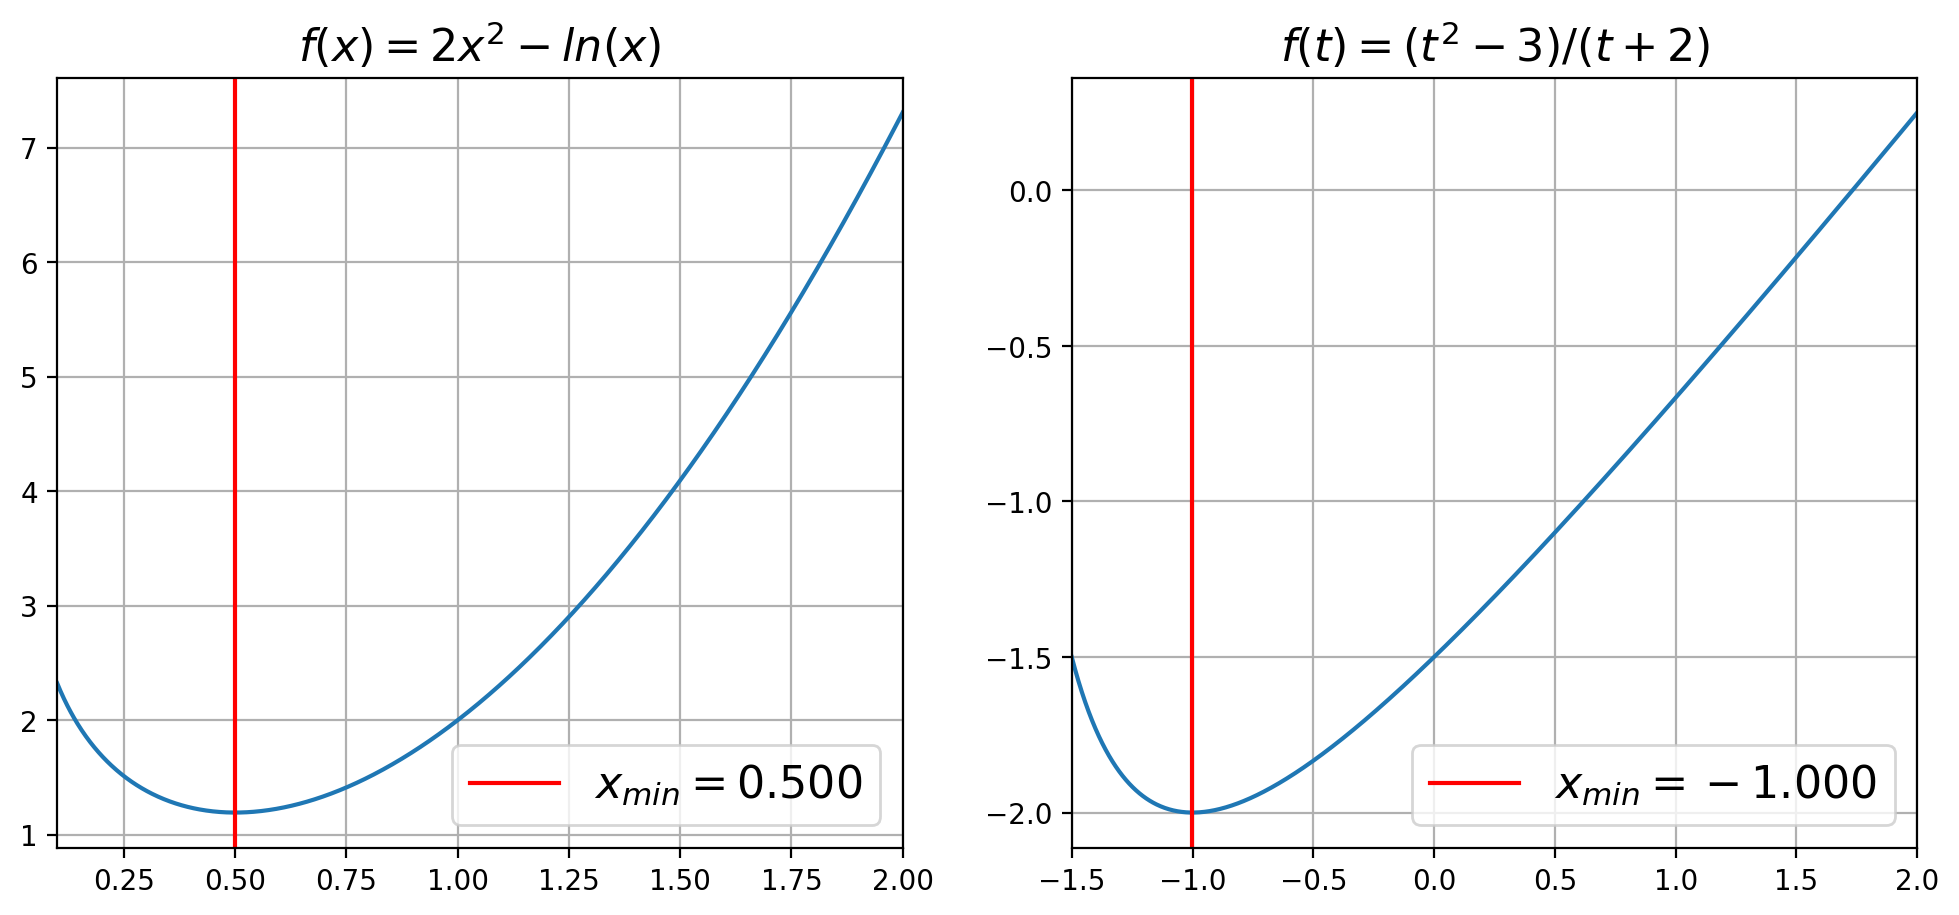

In [263]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)

x_line_1 = np.linspace(0.1, 2, 1000)
ax[0].plot(x_line_1, f1(x_line_1))
ax[0].axvline(min_f1, color = 'red', label = r'$x_{min} = %5.3f$' % min_f1)
ax[0].set_xlim(0.1, 2)
ax[0].set_title(r"$f(x) = 2x^{2} - ln(x)$", fontsize = 16)

x_line_2 = np.linspace(-1.5, 2, 1000)
ax[1].plot(x_line_2, f2(x_line_2))
ax[1].axvline(min_f2, color = 'red', label = r'$x_{min} = %5.3f$' % min_f2)
ax[1].set_xlim(-1.5, 2)
ax[1].set_title(r"$f(t) = (t^{2} - 3) / (t + 2)$", fontsize = 16)

for a in ax:
    a.legend(fontsize = 16)
    a.grid()

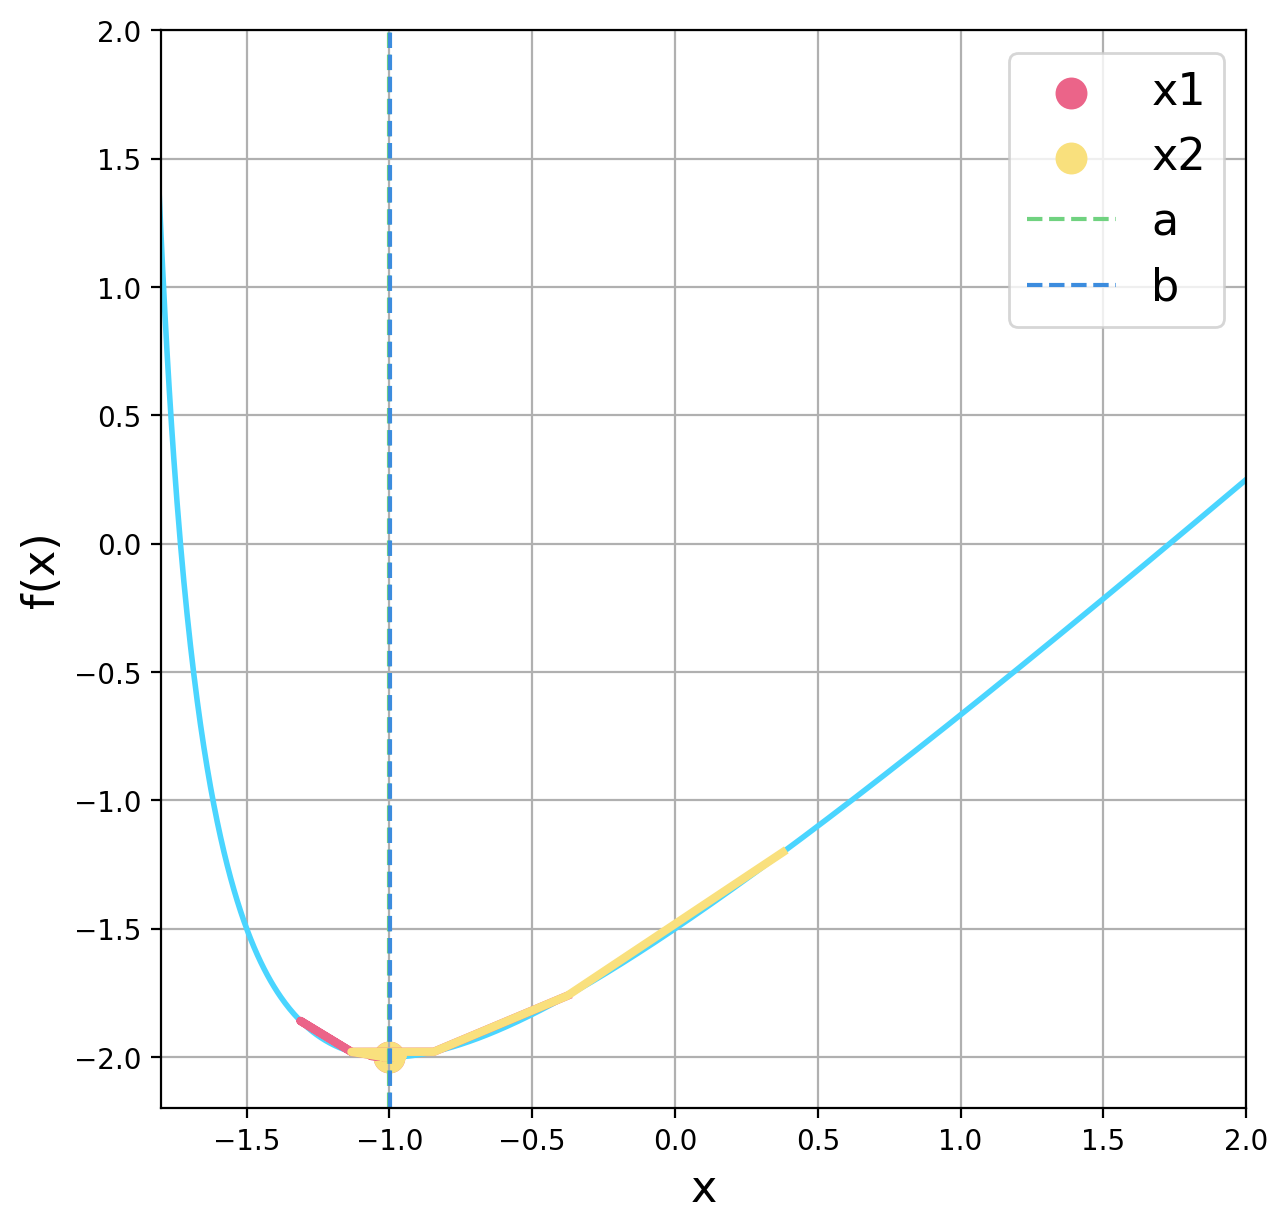

In [264]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(figsize = (7, 7), dpi = 200)
x = np.linspace(-1.9, 2, 1000)
line, = ax.plot(x, f2(x), lw=2)

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    ax.set_xticks(np.arange(-2, 2.5, 0.5))
    ax.set_xlim(-1.8, 2)
    ax.grid()
    ax.set_xlabel('x', fontsize = 16)
    ax.set_ylabel('f(x)', fontsize = 16)
    ax.set_ylim(-2.2, 2)
    return line,


def update(frame):
    ax.clear()
    ax.set_xticks(np.arange(-2, 2.5, 0.5))
    ax.set_xlim(-1.8, 2)
    ax.grid()
    ax.plot(x, f2(x), lw = 2, color = '#4ad5ff')
    ax.plot(history['x1'][:frame + 1], f2(np.array(history['x1'][:frame + 1])), color = '#eb6489', lw = 3)
    ax.plot(history['x2'][:frame + 1], f2(np.array(history['x2'][:frame + 1])), color = '#f9e07d', lw = 3)
    ax.scatter(history['x1'][frame], f2(history['x1'][frame]), color = '#eb6489', label = 'x1', s = 110)
    ax.scatter(history['x2'][frame], f2(history['x2'][frame]), color = '#f9e07d', label = 'x2', s = 110)
    ax.axvline(x = history['a'][frame], linestyle='--', color='#70d280', label='a')
    ax.axvline(x = history['b'][frame], linestyle='--', color='#3c8cde', label='b')
    ax.legend(loc = 'upper right', fontsize = 16)
    ax.set_xlabel('x', fontsize = 16)
    ax.set_ylabel('f(x)', fontsize = 16)
    ax.set_ylim(-2.2, 2)
    return line,

ani = FuncAnimation(fig, update, frames = len(history['x1']), init_func = init, blit = True)
ani.save("f2_minimization_fibb.mp4", fps = 2, extra_args=['-vcodec', 'libx264'])

### Задача 3

In [3]:
rastrigin_f = lambda x: 20 + np.power(x[0], 2) + np.power(x[1], 2) - 10 * np.cos(np.pi * x[0] * 2) - 10 * np.cos(np.pi * x[1] * 2)

x1_line = np.linspace(-2, 2, 1000)
x2_line = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x1_line, x2_line)

x0 = np.vstack([np.arange(-1, 1, 0.05), np.arange(-1, 1, 0.05)]).T
print(x0.shape)
minimums = opt.minimize(rastrigin_f, x0 = x0)
print(minimums.x.shape)

(40, 2)


/tmp/ipykernel_191478/2126587509.py:9: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  minimums = opt.minimize(rastrigin_f, x0 = x0)


(80,)


In [268]:
plt.figure(figsize = (5, 5), dpi = 200)
plt.pcolormesh(X, Y, rastrigin_f(X, Y), cmap = 'rainbow')
plt.colorbar()

TypeError: <lambda>() takes 1 positional argument but 2 were given

<Figure size 1000x1000 with 0 Axes>